In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz

--2023-12-07 21:39:41--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.96.206, 52.217.101.62, 16.182.108.72, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.96.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341663724 (326M) [application/x-tar]
Saving to: ‘imagenette2-320.tgz’

imagenette2-320.tgz 100%[===================>] 325.83M  31.2MB/s    in 10s     

2023-12-07 21:39:51 (32.4 MB/s) - ‘imagenette2-320.tgz’ saved [341663724/341663724]



In [ ]:
!tar zxvf 'imagenette2-320.tgz'

Streaming output truncated to the last 5000 lines.
imagenette2-320/train/n03888257/n03888257_16077.JPEG
imagenette2-320/train/n03888257/n03888257_23339.JPEG
imagenette2-320/train/n03888257/n03888257_44204.JPEG
imagenette2-320/train/n03888257/n03888257_61633.JPEG
imagenette2-320/train/n03888257/n03888257_15067.JPEG
imagenette2-320/train/n03888257/n03888257_75365.JPEG
imagenette2-320/train/n03888257/n03888257_63966.JPEG
imagenette2-320/train/n03888257/n03888257_3927.JPEG
imagenette2-320/train/n03888257/n03888257_20684.JPEG
imagenette2-320/train/n03888257/ILSVRC2012_val_00047778.JPEG
imagenette2-320/train/n03888257/n03888257_14016.JPEG
imagenette2-320/train/n03888257/n03888257_37776.JPEG
imagenette2-320/train/n03888257/ILSVRC2012_val_00041706.JPEG
imagenette2-320/train/n03888257/n03888257_17513.JPEG
imagenette2-320/train/n03888257/n03888257_17143.JPEG
imagenette2-320/train/n03888257/n03888257_6738.JPEG
imagenette2-320/train/n03888257/n03888257_4355.JPEG
imagenette2-320/train/n03888257/ILS

In [ ]:
import os
import tarfile
import urllib.request

# URL for the dataset
url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz'

# Download the dataset
file_name = 'imagenette2-320.tgz'
urllib.request.urlretrieve(url, file_name)

# Create a directory to extract the dataset
extract_dir = 'imagenette2-320'
os.makedirs(extract_dir, exist_ok=True)

# Extract the dataset
with tarfile.open(file_name, 'r:gz') as tar:
    tar.extractall(extract_dir)


Class distribution: Counter({'n02979186': 993, 'n01440764': 963, 'n03417042': 961, 'n03888257': 960, 'n03394916': 956, 'n02102040': 955, 'n03445777': 951, 'n03028079': 941, 'n03425413': 931, 'n03000684': 858})


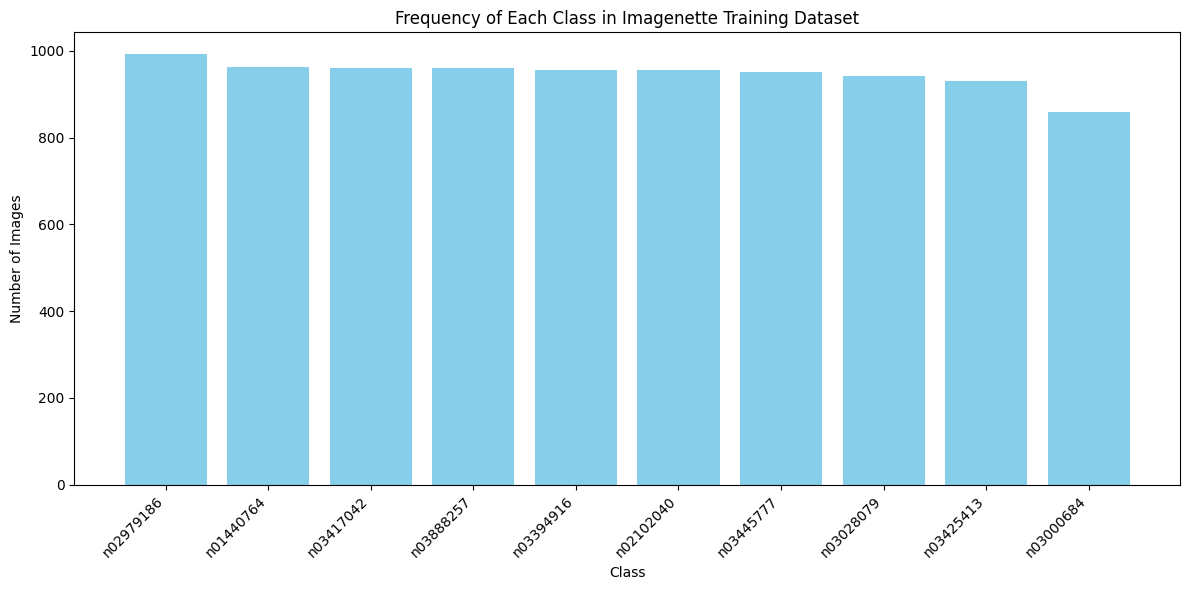

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

data_dir = 'imagenette2-320/train'  # Updated path to 'train' directory

# Function to get the class distribution
def get_class_distribution(data_dir):
    classes = [cls for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls))]
    class_counts = Counter()
    for cls in classes:
        class_path = os.path.join(data_dir, cls)
        if os.path.isdir(class_path):
            class_counts.update({cls: len(os.listdir(class_path))})
    return class_counts

# Get class distribution
class_distribution = get_class_distribution(data_dir)

# Print class distribution for debugging
print("Class distribution:", class_distribution)

# Convert the Counter to a DataFrame for easy plotting
df = pd.DataFrame(list(class_distribution.items()), columns=['Class', 'Count'])

# Sort the DataFrame by Count
df = df.sort_values(by='Count', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(df['Class'], df['Count'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Frequency of Each Class in Imagenette Training Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Class distribution (Val): Counter({'n03425413': 419, 'n03028079': 409, 'n03445777': 399, 'n02102040': 395, 'n03394916': 394, 'n03888257': 390, 'n03417042': 389, 'n01440764': 387, 'n03000684': 386, 'n02979186': 357})


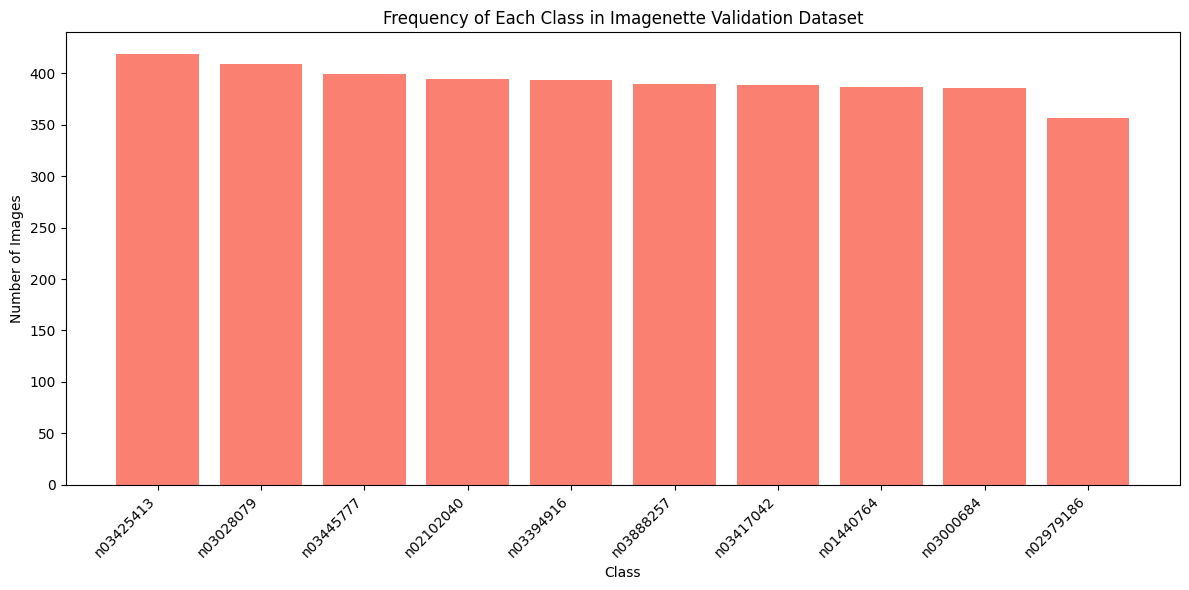

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

data_dir_val = 'imagenette2-320/val'

# Function to get the class distribution
def get_class_distribution(data_dir):
    classes = [cls for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls))]
    class_counts = Counter()
    for cls in classes:
        class_path = os.path.join(data_dir, cls)
        if os.path.isdir(class_path):
            class_counts.update({cls: len(os.listdir(class_path))})
    return class_counts

# Get class distribution for val
class_distribution_val = get_class_distribution(data_dir_val)

# Print class distribution for debugging
print("Class distribution (Val):", class_distribution_val)

# Convert the Counter to a DataFrame for easy plotting
df_val = pd.DataFrame(list(class_distribution_val.items()), columns=['Class', 'Count'])

# Sort the DataFrame by Count
df_val = df_val.sort_values(by='Count', ascending=False)

# Plotting the bar graph for val dataset
plt.figure(figsize=(12, 6))
plt.bar(df_val['Class'], df_val['Count'], color='salmon')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Frequency of Each Class in Imagenette Validation Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
